# [A] - Population Data Frame
To begin analyzing the population in the Syrian Arab Republic, let's first write a function that creates a population data frame indexed by country and year, with columns giving counts of people in different age-sex groups.

We need to install the necessary packages and extract data from the Population Estimates and Projections indicator.



In [1]:
"""
If necessary, uncomment and install:
"""
!pip install wbdata
!pip install cufflinks
!pip install iso3166

import iso3166 #iso3166.countries.get('country details')
import wbdata
import cufflinks as cf
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
cf.go_offline()

  Using cached wbdata-0.3.0-py3-none-any.whl (14 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.6.2 requires h5py~=3.1.0, but you'll have h5py 3.3.0 which is incompatible.
tensorflow 2.6.2 requires numpy~=1.19.2, but you'll have numpy 1.21.5 which is incompatible.
tensorflow 2.6.2 requires six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
tensorflow 2.6.2 requires typing-extensions~=3.7.4, but you'll have typing-extensions 4.1.1 which is incompatible.
fancyimpute 0.6.0 requires keras==2.4.3, but you'll have keras 2

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.



### [A] - Use of API Indicators

In [2]:
#wbdata.get_source()
#wbdata.get_topic()
#wbdata.get_indicator(topic=8)
#wbdata.search_countries("Syria")
#wbdata.search_countries("Jordan")
#wbdata.search_countries("Lebanon")
#wbdata.search_countries("Turkey")
SOURCE_40 = 40 # "Population estimates and projections
SOURCE_16 = 16 #Health Nutrition and Population Statistics
SOURCE_24 = 24 #Poverty and Equity

#indicators_40 = wbdata.get_indicator(source=SOURCE_40)
#indicators_40
#indicators_16 = wbdata.get_indicator(source=SOURCE_16)
#indicators_16
#indicators_24 = wbdata.get_indicator(source=SOURCE_24)
#indicators_24
#SOURCE_88 = 88 # "FPN Data Hub"

#indicators = wbdata.get_indicator(source=SOURCE_88)
#SOURCE = 27 # "Global Economic Prospects"
#SOURCE = 25 # "Jobs"


Now that we have all the necessary data, we can begin writing our function. The function pop_dataframe takes in inputs, year, group, age_lower, age_upper, and location. One limitation to our function is that age_lower and age_upper must be set to a multiple of 5.

In [3]:
year = 2020 #1960 to 2020
group = 'all' #males/females/all
age_lower = 0 #rounds to nearest 5 
age_upper = 80
location = 'Syrian Arab Republic'
def pop_dataframe(year = '2018', group = 'all', age_lower = 0, age_upper = 100, location ='world'):
    country_code = "WLD"
    if location != 'world':
        country_code = iso3166.countries.get(location).alpha3
    age_ranges = []
    for i in range(age_lower, age_upper, 5):
        age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    age_ranges.append("80UP")
    
    female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
    female_df = wbdata.get_dataframe(female_variables,country=country_code)
    female_data = female_df.query("date=='{}'".format(year)).sum(axis=0).tolist()
    
    male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
    male_df = wbdata.get_dataframe(male_variables,country=country_code)
    male_data = male_df.query("date=='{}'".format(year)).sum(axis=0).tolist()
    
    age_input = [i[:2]+'-'+i[2:] for i in age_ranges]
    
    df = pd.DataFrame({
        'Country': location,
        'Year': year,
        'Age': age_input,
        'Female': female_data,
        'Male': male_data,
    })
    
    df['People'] = df['Female'] + df['Male']
    
    return df


Great! Now that we have our function, we can test it out with different inputs. Since we are analyzing the Syrian Arab Republic and the effects of the Syrian war, we can look at the population in Syria in 2011, when the war began.



In [4]:
pop_dataframe(year = 2011, group = 'all', age_lower = 0, age_upper = 80, location = 'Syrian Arab Republic')

,Country,Year,Age,Female,Male,People
0,Syrian Arab Republic,2011,00-04,1409663.0,1468425.0,2878088.0
1,Syrian Arab Republic,2011,05-09,1229224.0,1281990.0,2511214.0
2,Syrian Arab Republic,2011,10-14,1155916.0,1217287.0,2373203.0
3,Syrian Arab Republic,2011,15-19,1050888.0,1108494.0,2159382.0
4,Syrian Arab Republic,2011,20-24,1037743.0,1077484.0,2115227.0
5,Syrian Arab Republic,2011,25-29,989813.0,998113.0,1987926.0
6,Syrian Arab Republic,2011,30-34,822739.0,810866.0,1633605.0
7,Syrian Arab Republic,2011,35-39,632588.0,617023.0,1249611.0
8,Syrian Arab Republic,2011,40-44,509993.0,497910.0,1007903.0
9,Syrian Arab Republic,2011,45-49,433185.0,424893.0,858078.0


As the war escalated, many Syrians seeked asylum in neighboring countries. Let's explore the population data in Syria five years into the war by using our pop_dataframe function again

In [5]:
pop_dataframe(year = 2016, group = 'all', age_lower = 0, age_upper = 80, location = 'Syrian Arab Republic')

,Country,Year,Age,Female,Male,People
0,Syrian Arab Republic,2016,00-04,935963.0,978003.0,1913966.0
1,Syrian Arab Republic,2016,05-09,968641.0,1006416.0,1975057.0
2,Syrian Arab Republic,2016,10-14,861840.0,901748.0,1763588.0
3,Syrian Arab Republic,2016,15-19,848246.0,894250.0,1742496.0
4,Syrian Arab Republic,2016,20-24,792248.0,840146.0,1632394.0
5,Syrian Arab Republic,2016,25-29,800179.0,843093.0,1643272.0
6,Syrian Arab Republic,2016,30-34,763503.0,769201.0,1532704.0
7,Syrian Arab Republic,2016,35-39,627092.0,606879.0,1233971.0
8,Syrian Arab Republic,2016,40-44,479610.0,459305.0,938915.0
9,Syrian Arab Republic,2016,45-49,389610.0,374465.0,764075.0


Analyzing our table, we can see that population numbers in 2016 for each age bin decreased from the numbers in 2011 when the war first began. This could be due to the large number of Syrians that fled the country, casualties of the war, or other reasons. Our project will further explore the potential determinants for population changes in Syria.

# [A] - Population Statistics Function
Rather than outputting a table every time we want to retrieve population data from a certain year, group, or age range, we should also create a function, population, that directly outputs the data we are interested in.

In [100]:
import iso3166 #iso3166.countries.get('country details')
location = 'Syrian Arab Republic'
def population_statistics(year, group, age_lower, age_upper, location):
    country_code = "WLD"
    og_l = age_lower
    og_u = age_upper
    if (age_lower % 5) != 0:
        age_lower = 5 * round(age_lower/5)
    if (age_upper % 5) != 0:
        age_upper = 5 * round(age_upper/5)   
    if location != 'world':
        country_code = iso3166.countries.get(location).alpha3
    age_ranges = []
    for i in range(age_lower, age_upper, 5):
        age_ranges.append(f"{i:02d}"+f"{i+4:02d}")
    
    female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}
    female_df = wbdata.get_dataframe(female_variables,country=country_code)
    female_data = female_df.query("date=='{}'".format(year)).sum(axis=0).tolist()
    
    male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
    male_df = wbdata.get_dataframe(male_variables,country=country_code)
    male_data = male_df.query("date=='{}'".format(year)).sum(axis=0).tolist()
    
    age_input = [i[:2]+'-'+i[2:] for i in age_ranges]
    
    df = pd.DataFrame({
        'Country': location,
        'Year': year,
        'Age': age_input,
        'Female': female_data,
        'Male': male_data,
    })
    
    if age_lower != og_l:
        true_sum_male = df["Male"].sum() - df["Male"][(age_lower/5)-2]/(abs(age_lower-og_l))
        true_sum_female = df["Female"].sum()  - df["Female"][(age_lower/5)-2]/(abs(age_lower-og_l))
    else: 
        true_sum_male = df["Male"].sum() 
        true_sum_female = df["Female"].sum() 
    
    if age_upper != og_u:
        true_sum_male = true_sum_male -  df["Male"][(age_lower/5)-2]/(abs(age_lower-og_l))
        true_sum_female = true_sum_female - df["Female"][(age_lower/5)-2]/(abs(age_lower-og_l))
    else: 
        true_sum_male = df["Male"].sum()
        true_sum_female = df["Male"].sum()
    all_sum = true_sum_female + true_sum_male
    
    if group == "Female":
        return true_sum_female
    elif group =="Male":
        return true_sum_male
    else: 
        return all_sum
population_statistics(2010, 'all', 14, 34, "SYR")


3656310.0

# General Population/Demographics Visualizations

The code below can be used to identify the different indicators for the wbdata so we can contruct charts and graphs based on subsets of the data. Addresses here and throughout the rest of the code, Deliverable [#A]: Use of Indicators API. 


The code below plots the total population of Syria between the years 1960-2020.

In [6]:
variable_labels_Syria = {"SP.POP.TOTL":"Syrian Total Population"}
variable_labels_Turkey = {"SP.POP.TOTL":"Turkey Total Population"}
variable_labels_Jordon = {"SP.POP.TOTL":"Jordon Total Population"}
variable_labels_Lebanon = {"SP.POP.TOTL":"Lebanon Total Population"}

Syria = wbdata.get_dataframe(variable_labels_Syria, country="SYR")
Turkey = wbdata.get_dataframe(variable_labels_Turkey, country="TUR")
Jordon = wbdata.get_dataframe(variable_labels_Jordon, country="JOR")
Lebanon = wbdata.get_dataframe(variable_labels_Lebanon, country="LBN")

Syria.index = Syria.index.astype(int)
Turkey.index = Syria.index.astype(int)
Jordon.index = Syria.index.astype(int)
Lebanon.index = Syria.index.astype(int)

print(Syria.head())
print(Turkey.head())
print(Jordon.head())
print(Lebanon.head())

      Syrian Total Population
date                         
2020               17500657.0
2019               17070132.0
2018               16945062.0
2017               17095669.0
2016               17465567.0
      Turkey Total Population
date                         
2020               84339067.0
2019               83429607.0
2018               82340090.0
2017               81116451.0
2016               79827868.0
      Jordon Total Population
date                         
2020               10203140.0
2019               10101697.0
2018                9965322.0
2017                9785840.0
2016                9554286.0
      Lebanon Total Population
date                          
2020                 6825442.0
2019                 6855709.0
2018                 6859408.0
2017                 6819373.0
2016                 6714281.0


In [7]:
Syria.iplot(title="Syrian Population over Time", xTitle='Year',yTitle='Population')

The code below graphs the total population of Syria, Turkey, Jordon, and Lebanon between the years 1960 and 2020.

In [10]:
variable_labels_pop = {"SP.POP.TOTL":"Population"}

# Three letter codes come from wbdata.get_country()
countries = {"SYR":"Syrian Pop",
             "TUR":"Turkey Pop",
             "JOR": "Jordan Pop",
             "LBN": "Lebanon"
            }

df = wbdata.get_dataframe(variable_labels_pop, country = countries).squeeze()

df = df.unstack('country')

# Date index is of type string; change to integers
df.index = df.index.astype(int)

# Differences (over time) in logs give us growth rates
df.iplot(title="Syrian vs. Neighbor States' Populations over Time",
                        yTitle="Population",xTitle='Year')

### [C] - Other Visualization Tools
The code below shows the growth rates (log function of total population growth) of Syria, Turkey, Lebanon, and Jordon between the years 1960 and 2020. This addresses part of Deliverable [#C]: Other Visualization Tools.

In [11]:
df = wbdata.get_dataframe(variable_labels, country = countries).squeeze()

df = df.unstack('country')

# Date index is of type string; change to integers
df.index = df.index.astype(int)

# Differences (over time) in logs give us growth rates
np.log(df).diff().iplot(title="Growth Rates of Syria vs. Neighbors",
                        yTitle="Growth Rate",xTitle='Year')

### [B] - Population Pyramid
The code below divides our Syrian population into age ranges and gender. This is the set up for the creation of a population pyramid.


In [12]:
age_ranges = []

for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

print(age_ranges)

['0004', '0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '7074', '7579', '80UP']


In [13]:
male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

print(variables)

{'SP.POP.0004.MA': 'Males 0004', 'SP.POP.0509.MA': 'Males 0509', 'SP.POP.1014.MA': 'Males 1014', 'SP.POP.1519.MA': 'Males 1519', 'SP.POP.2024.MA': 'Males 2024', 'SP.POP.2529.MA': 'Males 2529', 'SP.POP.3034.MA': 'Males 3034', 'SP.POP.3539.MA': 'Males 3539', 'SP.POP.4044.MA': 'Males 4044', 'SP.POP.4549.MA': 'Males 4549', 'SP.POP.5054.MA': 'Males 5054', 'SP.POP.5559.MA': 'Males 5559', 'SP.POP.6064.MA': 'Males 6064', 'SP.POP.6569.MA': 'Males 6569', 'SP.POP.7074.MA': 'Males 7074', 'SP.POP.7579.MA': 'Males 7579', 'SP.POP.80UP.MA': 'Males 80UP', 'SP.POP.0004.FE': 'Females 0004', 'SP.POP.0509.FE': 'Females 0509', 'SP.POP.1014.FE': 'Females 1014', 'SP.POP.1519.FE': 'Females 1519', 'SP.POP.2024.FE': 'Females 2024', 'SP.POP.2529.FE': 'Females 2529', 'SP.POP.3034.FE': 'Females 3034', 'SP.POP.3539.FE': 'Females 3539', 'SP.POP.4044.FE': 'Females 4044', 'SP.POP.4549.FE': 'Females 4549', 'SP.POP.5054.FE': 'Females 5054', 'SP.POP.5559.FE': 'Females 5559', 'SP.POP.6064.FE': 'Females 6064', 'SP.POP.6569.

In [24]:
# WLD is the World; substitute your own code or list of codes.
# Remember you can search for the appropriate codes using
# wbdata.search_countries("")

df = wbdata.get_dataframe(variables,country="SYR")
print(df.query("date=='2018'").sum(axis=0))

Males 0004      917756.0
Males 0509      920897.0
Males 1014      877456.0
Males 1519      817774.0
Males 2024      810441.0
Males 2529      776533.0
Males 3034      758448.0
Males 3539      633067.0
Males 4044      478697.0
Males 4549      374132.0
Males 5054      318360.0
Males 5559      264940.0
Males 6064      204174.0
Males 6569      144895.0
Males 7074       88235.0
Males 7579       59539.0
Males 80UP       58669.0
Females 0004    878973.0
Females 0509    886257.0
Females 1014    843057.0
Females 1519    781336.0
Females 2024    770275.0
Females 2529    737783.0
Females 3034    743139.0
Females 3539    651060.0
Females 4044    503364.0
Females 4549    393147.0
Females 5054    336356.0
Females 5559    282593.0
Females 6064    221983.0
Females 6569    159627.0
Females 7074     99388.0
Females 7579     76344.0
Females 80UP     76367.0
dtype: float64


The code below creates a population pyramid that is divided by gender and age (in 20 year increments). Women are on the left, men are on the right. This addresses Deliverable [#B]: Population Pyramids.


In [25]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

year = 2018

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='purple'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='pink'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

### [C] - Animated Population Pyramid
The code below creates an animated population pyramid that illustrates the changes in population structure by age range and gender, over the years 1978 to 2018. This addresses Deliverable [#C]: Animated Population Pyramids.


In [26]:
# Count down by increments of 20 years
years = range(2018,1960,-20)

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men {:d}'.format(year),
               hoverinfo='skip'
              )
        for year in years]
          
bins += [go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
                y=[int(s[:2])+1 for s in age_ranges],
                orientation='h',
                name='Women {:d}'.format(year),
                hoverinfo='skip',
               )
         for year in years]

py.iplot(dict(data=bins, layout=layout))

# Refugee & Asylum Seekers Demographics


In [53]:


refugee_variables = {"SM.POP.REFG":"Refugee population by country or territory of asylum",
                     "SM.POP.REFG.OR":"Refugee population by country or territory of origin"}

countries = {'SYR': 'Syria', 'JOR': 'Jordan', 'LBN': 'Lebanon', 'TUR': 'Turkey'}


First, we want to visualize, using the World Bank data, how many refugees and asylum seekers orginiated from Syria over time.

### [B] - Construct Plots in Python using plotly

In [54]:
syrian_refugees = wbdata.get_dataframe(refugee_variables, country='SYR')
syrian_refugees

,Refugee population by country or territory of asylum,Refugee population by country or territory of origin
date,,
2020,584059.0,6689582.0
2019,578525.0,6615249.0
2018,578956.0,6654374.0
2017,571298.0,6310498.0
2016,562821.0,5524511.0
...,...,...
1964,133366.0,NaN
1963,129010.0,NaN
1962,124626.0,NaN


Note that the left column, 'Refugee population by country or territory of asylum', indicates the number of people who are refugees within Syria, whereas the right column, 'Refugee population by country or territory of origin', indicates the number of people from Syria who became refugees.

In [55]:
syrian_refugees = syrian_refugees.sort_values(by=['date']) #organize in chronological order so that 1960 appears first

In [56]:
syrian_refugees["Refugee population by country or territory of asylum"].iplot(title= 'Number of refugees within Syria', xTitle = 'Year', yTitle = 'Number of Refugees in Syria')


In [57]:
syrian_refugees["Refugee population by country or territory of origin"].iplot(title= 'Total number of refugees from Syria', xTitle = 'Year', yTitle = 'Number of Refugees from Syria')


Based on a report from the United Nations High Commissioner for Refugees (UNHCR), we were able to compile the total number of Syrian refugees and asylum seekers in neighboring countries and regions: Turkey, Lebanon, Jordan, Iraq, Egypt, and other North African countries as of 2021. This information is compiled in the dataframe neighboring_refugees_df below, and we can visualize it in the bar graph below. 

In [58]:
neighboring_refugees_df = pd.DataFrame({'Country/Region' :['Turkey', 'Lebanon', 'Jordan', 'Iraq', 'Egypt', 'Other (North Africa)']
                                        , 'Total Number of Syrian Refugees & Asylum Seekers (2021)' : [3736235, 840929, 672952, 254561, 136727, 42578]})

neighboring_refugees_df

,Country/Region,Total Number of Syrian Refugees & Asylum Seekers (2021)
0,Turkey,3736235
1,Lebanon,840929
2,Jordan,672952
3,Iraq,254561
4,Egypt,136727
5,Other (North Africa),42578


### [B] - Construct Plots in using matplotlib

Text(0.5, 1.0, 'Countries/Regions Neighboring Syria with the Largest Populations of Syrian Refugees (2021)')

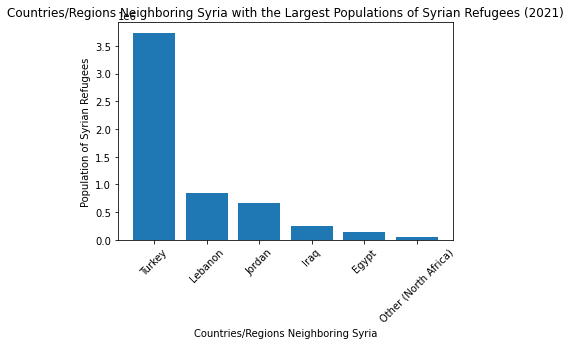

In [59]:

plt.bar(neighboring_refugees_df['Country/Region'], neighboring_refugees_df['Total Number of Syrian Refugees & Asylum Seekers (2021)'])
plt.xticks(rotation=45)
plt.xlabel('Countries/Regions Neighboring Syria')
plt.ylabel('Population of Syrian Refugees')
plt.title('Countries/Regions Neighboring Syria with the Largest Populations of Syrian Refugees (2021)')

We can further visualize the increase in the total number of refugees in Turkey, Jordan, and Lebanon using the World Bank data, particularly within the last ten years.

In [60]:
jordan_refugees = wbdata.get_dataframe(refugee_variables, country="JOR")
jordan_refugees

,Refugee population by country or territory of asylum,Refugee population by country or territory of origin
date,,
2020,3009517.0,2489.0
2019,2966079.0,2313.0
2018,2957877.0,2426.0
2017,2897751.0,2119.0
2016,2860679.0,1919.0
...,...,...
1964,678985.0,NaN
1963,662525.0,NaN
1962,644940.0,NaN


In [61]:
jordan_refugees = jordan_refugees.sort_values(by=['date']) #organize in chronological order so that 1960 appears first

In [62]:
jordan_refugees["Refugee population by country or territory of asylum"].iplot(title = 'Total number of refugees in Jordan', xTitle = 'Year', yTitle = 'Number of Refugees in Jordan')


In [63]:
lebanon_refugees = wbdata.get_dataframe(refugee_variables, country='LBN')
lebanon_refugees

,Refugee population by country or territory of asylum,Refugee population by country or territory of origin
date,,
2020,1349955.0,5495.0
2019,1392174.0,5647.0
2018,1424728.0,5621.0
2017,1468431.0,5302.0
2016,1476623.0,4719.0
...,...,...
1964,158584.0,NaN
1963,152747.0,NaN
1962,146969.0,NaN


In [64]:
lebanon_refugees = lebanon_refugees.sort_values(by=['date']) #organize in chronological order so that 1960 appears first

In [65]:
lebanon_refugees["Refugee population by country or territory of asylum"].iplot(title = 'Total number of refugees in Lebanon', xTitle = 'Year', yTitle = 'Number of Refugees in Lebanon')


In [66]:
turkey_refugees = wbdata.get_dataframe(refugee_variables, country='TUR')
turkey_refugees

,Refugee population by country or territory of asylum,Refugee population by country or territory of origin
date,,
2020,3652362.0,93738.0
2019,3579531.0,83239.0
2018,3681688.0,68900.0
2017,3480350.0,61383.0
2016,2869419.0,57915.0
...,...,...
1964,2300.0,NaN
1963,2300.0,NaN
1962,2300.0,NaN


In [67]:
turkey_refugees = turkey_refugees.sort_values(by=['date']) #organize in chronological order so that 1960 appears first

In [68]:
turkey_refugees["Refugee population by country or territory of asylum"].iplot(title = 'Total number of refugees in Turkey', xTitle = 'Year', yTitle = 'Number of Refugees in Turkey')


We also took a closer look at the demographics of Syrian refugees within Turkey, Lebanon, and Jordan. Below, we have compiled information about the populations of Syrian refugees in different governorates/regions in Turkey, Lebanon, and Jordan. We also constructed a map that indicates these regions with markers.

In [69]:
jordan_regions = pd.DataFrame({'Jordanian Governorate': ['Amman', 'Mafrak', 'Irbid', 'Zarqa', 'Balqa', 'Madaba', 'Jarash', 'Karak', 'Maan', 'Ajlun', 'Aqaba', 'Tafilah'], 
                               'Population': [199204, 168792, 136279, 98483, 17978, 13438, 9295, 8532, 8352, 6435, 3814, 1705]
                              })
jordan_regions


,Jordanian Governorate,Population
0,Amman,199204
1,Mafrak,168792
2,Irbid,136279
3,Zarqa,98483
4,Balqa,17978
5,Madaba,13438
6,Jarash,9295
7,Karak,8532
8,Maan,8352
9,Ajlun,6435


Text(0.5, 1.0, 'Population of Syrian Refugees per Jordanian Governorate')

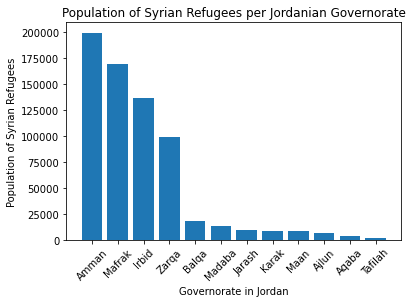

In [70]:
plt.bar(jordan_regions['Jordanian Governorate'], jordan_regions['Population'])
plt.xlabel('Governorate in Jordan')
plt.ylabel('Population of Syrian Refugees')
plt.xticks(rotation=45)
plt.title('Population of Syrian Refugees per Jordanian Governorate')

In [71]:
lebanon_regions = pd.DataFrame({'Lebanese Governorate': ['Akkar', 'North', 'Baalbel-El Hermel', 'Mount Lebanon', 'Bekaa', 'Nabatieh', 'South'], 
                                'Population': [104537, 126064, 119195, 183669, 215473, 32557, 59936]
    
})
lebanon_regions

,Lebanese Governorate,Population
0,Akkar,104537
1,North,126064
2,Baalbel-El Hermel,119195
3,Mount Lebanon,183669
4,Bekaa,215473
5,Nabatieh,32557
6,South,59936


Text(0.5, 1.0, 'Population of Syrian Refugees per Lebanese Governorate')

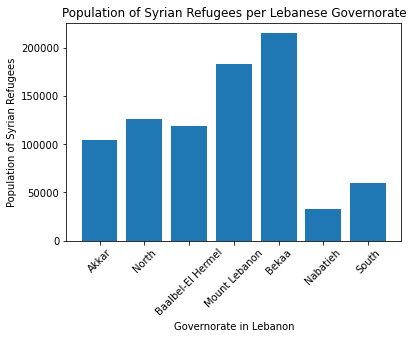

In [72]:
plt.bar(lebanon_regions['Lebanese Governorate'], lebanon_regions['Population'])
plt.xlabel('Governorate in Lebanon')
plt.ylabel('Population of Syrian Refugees')
plt.xticks(rotation=45)
plt.title('Population of Syrian Refugees per Lebanese Governorate')

### [C] - Construct World Maps
We thought it would be interesting to create an interative map where we could label the areas in Jordan, Lebanon, and Turkey with the largest populations of Syrian refugees.

We used the following website/online tutorial to learn about folium maps and to help generate this code:

Holtz, Yan. (n.d.). Map with markers with python and folium. The Python Graph Gallery. Retrieved February 2, 2022, from https://www.python-graph-gallery.com/312-add-markers-on-folium-map

In [73]:
import folium
my_map = folium.Map()

In [74]:
locations = pd.DataFrame({
    'lat':[31.9539, 32.3417, 32.5568, 32.0608, 32.0367,
           31.7193, 32.2747, 31.1853, 30.1927, 32.3326,
           29.5321, 30.8837, 41.0082, 36.2023, 37.1674, 
           37.0660, 36.7165, 37.5753, 37.7636, 37.0746, 36.9914,
          34.5440, 34.0047, 34.4381, 33.8101, 33.8463, 33.3772, 33.2721],
   'lon':[35.9106, 36.2020, 35.8469, 36.0942, 35.7288, 
          35.7932, 35.8961, 35.7048, 35.7249, 35.7517, 
          35.0063, 35.6161, 28.9784, 36.1613, 38.7955, 
          37.3781, 37.1147, 36.9228, 38.2773, 36.2464, 35.3308,
         36.0798, 36.2110, 35.9308, 35.5973, 35.9019, 35.4836, 35.2033],
   'name':['Amman', 'Mafrak', 'Irbid', 'Zarqa', 'Balqa', 
           'Madaba', 'Jarash', 'Karak', 'Maan', 'Ajlun', 
           'Aqaba', 'Tafilah', 'Istanbul', 'Hatay', 'Sanliurfa', 
           'Gaziantep','Kilis', 'Kahramanmaras', 'Adiyaman', 'Osmaniye', 'Adana', 
          'Akkar', 'Baalbek-El Hermel', 'North', 'Mount Lebanon', 'Bekaa', 'Nabatieh', 'South']
}, dtype=str)

locations

,lat,lon,name
0,31.9539,35.9106,Amman
1,32.3417,36.202,Mafrak
2,32.5568,35.8469,Irbid
3,32.0608,36.0942,Zarqa
4,32.0367,35.7288,Balqa
5,31.7193,35.7932,Madaba
6,32.2747,35.8961,Jarash
7,31.1853,35.7048,Karak
8,30.1927,35.7249,Maan
9,32.3326,35.7517,Ajlun


In [75]:
for i in range(0,len(locations)):
    folium.Marker(
      location=[locations.iloc[i]['lat'], locations.iloc[i]['lon']],
      popup=locations.iloc[i]['name'],
   ).add_to(my_map)

my_map

# Fertility Rate in Syria: [C] - Other Visualization Tools
We wanted to observe overall trends in fertility rate over time in Syria. Based on the total fertility rate plots below for Syria, Jordan, Lebanon, and the world, we notice that the fertility rates and trends over time all appear to be somewhat similar over the last decade in particular, with the average number of children being below 3 by 2020 in all four data visualizations.

In [76]:
variable_labels_fertility = {'SP.POP.TOTL': 'Total Population',
                   "SP.DYN.TFRT.IN":"Total Fertility Rate", "SP.POP.1564.FE.ZS":"% Adult Female",
                  }

syria_fertility = wbdata.get_dataframe(variable_labels_fertility, country="SYR")


# Date index is of type string; change to integers
syria_fertility.index = syria.index.astype(int)

# Print a few years' data
syria_fertility.tail(15)

,Total Population,Total Fertility Rate,% Adult Female
date,,,
1974,7283181.0,7.510,48.582184
1973,7037860.0,7.537,48.580067
1972,6800148.0,7.556,48.586751
1971,6570859.0,7.566,48.563689
1970,6350544.0,7.572,48.492421
1969,6139054.0,7.574,48.243714
1968,5935850.0,7.574,47.923344
1967,5740702.0,7.572,47.604031
1966,5553247.0,7.569,47.425878


In [77]:
syria["Total Fertility Rate"].iplot(title = 'Total fertility rate in Syria', xTitle = 'Year', yTitle = 'Average Number of Children')


In [80]:
jordan_fertility = wbdata.get_dataframe(variable_labels_fertility, country="JOR")
jordan_fertility = jordan_fertility.sort_values(by=['date'])
jordan_fertility

,Total Population,Total Fertility Rate,% Adult Female
date,,,
1960,933102.0,7.687,53.167405
1961,973983.0,7.802,52.855192
1962,1010647.0,7.904,52.593650
1963,1050212.0,7.983,52.336553
1964,1102404.0,8.034,52.022374
...,...,...,...
2016,9554286.0,2.954,60.574455
2017,9785840.0,2.849,61.141432
2018,9965322.0,2.761,61.765018


In [81]:
jordan_fertility["Total Fertility Rate"].iplot(title = 'Total fertility rate in Jordan', xTitle = 'Year', yTitle = 'Average Number of Children')


In [82]:
lebanon_fertility = wbdata.get_dataframe(variable_labels_fertility, country="LBN")
lebanon_fertility = lebanon_fertility.sort_values(by=['date'])
lebanon_fertility

,Total Population,Total Fertility Rate,% Adult Female
date,,,
1960,1804935.0,5.739,52.612546
1961,1864613.0,5.724,52.244225
1962,1925295.0,5.694,51.769993
1963,1984999.0,5.647,51.321030
1964,2041231.0,5.583,51.078156
...,...,...,...
2016,6714281.0,2.104,66.856660
2017,6819373.0,2.097,66.995471
2018,6859408.0,2.087,67.170315


In [83]:
lebanon_fertility["Total Fertility Rate"].iplot(title = 'Total fertility rate in Lebanon', xTitle = 'Year', yTitle = 'Average Number of Children')


In [84]:
turkey_fertility = wbdata.get_dataframe(variable_labels_fertility, country="TUR")
turkey_fertility = turkey_fertility.sort_values(by=['date'])
turkey_fertility

,Total Population,Total Fertility Rate,% Adult Female
date,,,
1960,27472339.0,6.366,54.020135
1961,28146909.0,6.304,53.675872
1962,28832831.0,6.237,53.267786
1963,29531362.0,6.165,52.897489
1964,30244258.0,6.089,52.711736
...,...,...,...
2016,79827868.0,2.092,66.532088
2017,81116451.0,2.081,66.571251
2018,82340090.0,2.069,66.610315


In [85]:
turkey_fertility["Total Fertility Rate"].iplot(title = 'Total fertility rate in Turkey', xTitle = 'Year', yTitle = 'Average Number of Children')


In [86]:
world_fertility = wbdata.get_dataframe(variable_labels_fertility, country="WLD")
world_fertility = world_fertility.sort_values(by=['date'])
world_fertility

,Total Population,Total Fertility Rate,% Adult Female
date,,,
1960,3.032156e+09,4.979299,57.898760
1961,3.071596e+09,5.003564,57.661951
1962,3.124561e+09,5.025367,57.408785
1963,3.189656e+09,5.045551,57.183595
1964,3.255146e+09,5.056470,57.046855
...,...,...,...
2016,7.433569e+09,2.444646,65.189386
2017,7.519183e+09,2.427212,65.088481
2018,7.602454e+09,2.415040,64.975756


In [87]:
world_fertility["Total Fertility Rate"].iplot(title = 'Total world fertility rate', xTitle = 'Year', yTitle = 'Average Number of Children')


# GDP & Economic Changes as a Result of War in Syria: [C] - Other Visualization Tools

In [88]:
variable_labels_econ = {"NY.GDP.MKTP.KD.ZG" : "Syria GDP Growth",
                   "SP.POP.GROW" : "Syrian Population Growth",
                  }
syriadata5 = wbdata.get_dataframe(variable_labels_econ, country="SYR")

# Date index is of type string; change to integers
syriadata5.index = syriadata5.index.astype(int)

# Print a few years' data
syriadata5.head(12)

,Syria GDP Growth,Syrian Population Growth
date,,
2020,NaN,2.490815
2019,3.747775,0.735381
2018,1.475766,-0.884869
2017,-0.727487,-2.140619
2016,-5.630438,-2.999657
2015,-3.187281,-3.886823
2014,-10.310340,-4.533415
2013,-26.300088,-4.300775
2012,-26.339017,-3.097273


In [89]:
syriadata5.head(12).iplot(title="Syria GDP Growth During War Times",
                        yTitle="Growth from Previous Year (%)",xTitle='Year')

In [90]:
SOURCE = 27 # "Global Economic Prospects"

indicators = wbdata.get_indicator(source=SOURCE)
indicators

id            name
------------  ----------------------------------------------------------------------------------------
NYGDPMKTPKDZ  Annual percentage growth rate of GDP at market prices based on constant 2010 US Dollars.

In [91]:
variable_labels = {"EF.EFM.RANK.XD" : "Syria Overall Economic Health"}
syriadata1 = wbdata.get_dataframe(variable_labels, country="SYR")

# Date index is of type string; change to integers
syriadata1.index = syriadata1.index.astype(int)

# Print a few years' data
syriadata1

,Syria Overall Economic Health
date,
2015,64.0
2014,63.0
2013,53.0
2012,45.0
2011,56.0
2010,52.0
2009,55.0
2008,61.0
2007,57.0


Economic Fitness (EF) is both a measure of a country's diversification and ability to produce complex goods on a globally competitive basis.

In [92]:
variable_labels_econ2 = {"EF.EFM.RANK.XD" : "Economic Health (1 = High, 149 = Low)"}
countries = {"SYR": "Syria",
             "LBN" : "Lebannon",
             "TUR" : "Turkey",
             "JOR" : "Jordan",
            }

df = wbdata.get_dataframe(variable_labels_econ2, country = countries).squeeze()

df = df.unstack('country')
# Date index is of type string; change to integers
df.index = df.index.astype(int)

# Differences (over time) in logs give us growth rates
df.tail(7).iplot(title="Economic Fitness of Middle Eastern Countries during Syrian Civil War",
                        yTitle="Fitness (1 = Good, 149 = Bad)",xTitle='Year')

In [93]:
def economic_health_change(df, year): 
    return ((df.iloc[year - 2009] - df.iloc[0])/df.iloc[0])*100

In [94]:
tt9 = economic_health_change(df,2009)
ttt = economic_health_change(df, 2010)
tte = economic_health_change(df, 2011)
tttw = economic_health_change(df, 2012)
ttth = economic_health_change(df, 2013)
ttfo = economic_health_change(df, 2014)
ttf = economic_health_change(df, 2015)

In [95]:
tt9frame = tt9.to_frame()
tttframe = ttt.to_frame()
tteframe = tte.to_frame()
tttwframe = tttw.to_frame()
ttthframe = ttth.to_frame()
ttfoframe = ttfo.to_frame()
ttfframe = ttf.to_frame()

In [96]:
#frames = [tt9frame, tttframe, tteframe, tttwframe, ttthframe, ttfoframe, ttfframe]
df2 = tt9frame.merge(tttframe, on = 'country')
df3 = df2.rename(columns = {"0_x" : "2009", "0_y" : "2010"})
df4 = df3.merge(tteframe, on = "country").merge(tttwframe, on = "country").rename(columns = {"0_x":"2011","0_y":"2012"})
df5 = df4.merge(ttthframe, on = "country").merge(ttfoframe, on = "country").rename(columns = {"0_x":"2013","0_y":"2014"})
df6 = df5.merge(ttfframe, on = "country")
df6.columns = np.arange(2009, 2016)

In [97]:
df6.T.iplot(title="Change in Economic Fitness from 2009",
                        yTitle="% Change in Fitness from 2009",xTitle='Year')

In [101]:
variable_labels_laborforce = {"SL.TLF.TOTL.IN" : "Syria Total Labor Force"}
syriadata2 = wbdata.get_dataframe(variable_labels_laborforce, country="SYR")

# Date index is of type string; change to integers
syriadata2.index = syriadata2.index.astype(int)

# Print a few years' data
syriadata2.head(10)

,Syria Total Labor Force
date,
2020,5165789.0
2019,5224030.0
2018,5147953.0
2017,5148826.0
2016,5201252.0
2015,5292804.0
2014,5402002.0
2013,5536735.0
2012,5668055.0


In [102]:
variable_labels_unemployment = {"SL.UEM.TOTL.ZS" : "Syrian Unemployment Rate"}
syriadata4 = wbdata.get_dataframe(variable_labels_unemployment, country="SYR")

# Date index is of type string; change to integers
syriadata4.index = syriadata4.index.astype(int)

# Print a few years' data
syriadata4.head(12)

,Syrian Unemployment Rate
date,
2020,9.03
2019,8.16
2018,8.23
2017,8.33
2016,8.44
2015,8.50
2014,8.55
2013,8.62
2012,8.61


In [103]:
df7 = syriadata1.merge(syriadata2, on = 'date')
df7 = df7.merge(syriadata4, on = 'date')
df7

,Syria Overall Economic Health,Syria Total Labor Force,Syrian Unemployment Rate
date,,,
2015,64.0,5292804.0,8.50
2014,63.0,5402002.0,8.55
2013,53.0,5536735.0,8.62
2012,45.0,5668055.0,8.61
2011,56.0,5757902.0,8.60
2010,52.0,5768644.0,8.61
2009,55.0,5653165.0,8.14
2008,61.0,5693700.0,10.94
2007,57.0,5469455.0,8.42


In [104]:
lf1 = economic_health_change(df7, 2009).to_frame()
lf2 = economic_health_change(df7, 2010).to_frame()
lf3 = economic_health_change(df7, 2011).to_frame()
lf4 = economic_health_change(df7, 2012).to_frame()
lf5 = economic_health_change(df7, 2013).to_frame()
lf6 = economic_health_change(df7, 2014).to_frame()
lf7 = economic_health_change(df7, 2015).to_frame()

In [105]:
index = [1,2, 3]
lf1["Index"] = index
lf2["Index"] = index
lf3["Index"] = index
lf4["Index"] = index
lf5["Index"] = index
lf6["Index"] = index
lf7["Index"] = index

In [106]:
lf1.set_index('Index')
lf2.set_index('Index')
lf3.set_index('Index')
lf4.set_index('Index')
lf5.set_index('Index')
lf6.set_index('Index')
lf7.set_index('Index')

,0
Index,
1,-14.062500
2,6.808508
3,-4.235294


In [107]:
n1 = lf2.merge(lf3, on = "Index").merge(lf4, on = "Index")
n2 = n1.rename(columns = {"2015" : "2009", "0_x" : "2010", "0_y" : "2011"})
n3 = n2.merge(lf5, on = "Index").merge(lf6, on = "Index").rename(columns = {"0_x" : "2012", "0_y" : "2013"})
n4 = n3.rename(columns = {"0_x" : "2014", "0_y" : "2015"})
n4 = n4.merge(lf7, on = "Index")
index = ["Change in Economic Health From 2009", "Change in Labor Force from 2009", "Change in Employment Rate"]
n4["Index"] = index
n4 = n4.set_index("Index")
n4.columns = np.arange(2010,2016)
n4

,2010,2011,2012,2013,2014,2015
Index,,,,,,
Change in Economic Health From 2009,-1.562500,-17.187500,-29.687500,-12.500000,-18.750000,-14.062500
Change in Labor Force from 2009,2.063141,4.608729,7.089834,8.787365,8.990320,6.808508
Change in Employment Rate,0.588235,1.411765,1.294118,1.176471,1.294118,-4.235294


In [108]:
n4.T.iplot(title="Change in Syrian Economic Fitness and Labor Force from 2009 to 2015 YoY",
                        yTitle="% Change in Fitness from 1995",xTitle='Year')

There appears to be no clear correlation between the size of the Syrian labor force and economic health but there is a clear correlation between the unemployment rate and the available Syrian labor force.


In [109]:
variable_labels_urbanpop = {"SP.URB.TOTL" : "Syrian Urban Population",
                   "SL.TLF.TOTL.IN" : "Total Syrian Labor Force"}
syriadatax = wbdata.get_dataframe(variable_labels_urbanpop, country="SYR")

# Date index is of type string; change to integers
syriadatax.index = syriadatax.index.astype(int)

# Print a few years' data
syriadatax.head(12)

,Syrian Urban Population,Total Syrian Labor Force
date,,
2020,9708489.0,5165789.0
2019,9358017.0,5224030.0
2018,9177784.0,5147953.0
2017,9146183.0,5148826.0
2016,9227932.0,5201252.0
2015,9388889.0,5292804.0
2014,9636016.0,5402002.0
2013,10284372.0,5536735.0
2012,10946032.0,5668055.0


In [110]:
syriadatax.head(12).iplot(title="Number of Syrians Living in Urban Areas",
                        yTitle="Count",xTitle='Year')

In [111]:
x = (5.15-5.65)/5.65

print(x)
print("The change in Labor Force from 2009 to 2017 is -8.8%")

y = (9.14-11.71)/11.71

print(y)
print("The change in Urban Population from 2009 to 2017 is -21.9%")

-0.08849557522123894
The change in Labor Force from 2009 to 2017 is -8.8%
-0.21947053800170796
The change in Urban Population from 2009 to 2017 is -21.9%


# [C] - Agricultural Supply

In [113]:
vars = {"AG.LND.ARBL.HA":"Arable Land"}
use=["SY","AFG"]
def fix_date_index(df):
    idx_vars = df.index.names
    new = df.reset_index()
    new.date = new.date.astype(int)
    return new.set_index(idx_vars)

cereals = fix_date_index(wbdata.get_dataframe(vars,country=use)).squeeze().unstack('country')

cereals.iplot(xTitle="Year",yTitle="Metric Tons",
              title="Arable Land %")

In [114]:
vars = {"AG.LND.ARBL.HA.PC":"Arable Land"}
use=["SY","AFG"]
def fix_date_index(df):
    idx_vars = df.index.names
    new = df.reset_index()
    new.date = new.date.astype(int)
    return new.set_index(idx_vars)

cereals = fix_date_index(wbdata.get_dataframe(vars,country=use)).squeeze().unstack('country')

cereals.iplot(xTitle="Year",yTitle="%per capita",
              title="Arable Land % per Capita")

In [115]:
vars = {"AG.PRD.LVSK.XD":"Livestock index",
        "AG.PRD.FOOD.XD":"Food index",
        "AG.PRD.CROP.XD":"Crop index"}

food = fix_date_index(wbdata.get_dataframe(vars,country='SY'))

food.iplot(xTitle="Year",yTitle="Index",title="Agriculture Over Time")

In [116]:
vars = {"AG.LND.ARBL.ZS":"Arable Land"}
use=["SY","AFG"]
def fix_date_index(df):
    idx_vars = df.index.names
    new = df.reset_index()
    new.date = new.date.astype(int)
    return new.set_index(idx_vars)

cereals = fix_date_index(wbdata.get_dataframe(vars,country=use)).squeeze().unstack('country')

cereals.iplot(xTitle="Year",yTitle="Metric Tons",
              title="Arable Land %")

In [117]:

vars = {"SL.AGR.EMPL.ZS":"% employed in agriculture"}
use=["SY","AFG","USA"]
cereals = fix_date_index(wbdata.get_dataframe(vars,country=use)).squeeze().unstack('country')

cereals.iplot(xTitle="Year",yTitle="%",
              title="Agriculture Employment %",filename='basic-bar')